In [10]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(0)

In [2]:
img = cv2.imread("Computer_Vision/data/cat.jpg")
img = cv2.resize(img, (224,224))

cv2.imshow("frame", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### VGG16

##### Block 1

In [36]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# VGG16
model = keras.Sequential()

# block 1
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.build()
model.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_82 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 379ms/step


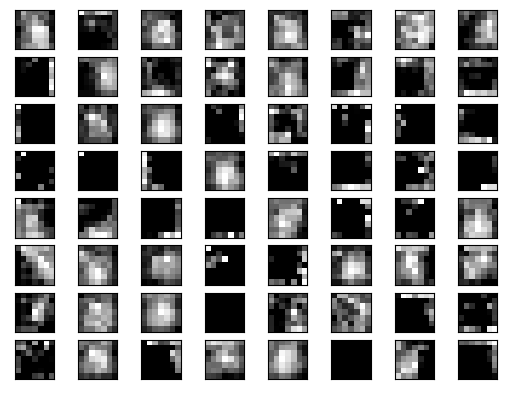

In [35]:
# results
feature_map = model.predict(np.array([img]))

for i in range(64):
    feature_img = feature_map[0,:,:,i]
    ax = plt.subplot(8, 8, i+1) # 8x8 grid of feature images
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_img, cmap="gray")

plt.show();

In [37]:
# block 2
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))                                                                    

# block 3                                                                                       
model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 

# block 4
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# block 5
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 

# block 6
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(3, activation="softmax"))


model.build()                               
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_82 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_84 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [39]:
result = model.predict(np.array([img]))
result

1/1 [==============================] - 0s 463ms/step


array([[0.24542162, 0.36632353, 0.38825494]], dtype=float32)